## Objective: To find out the properties of a product, and store which impacts the sales of a product.

In [1]:
# import all necessary
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset 
df = pd.read_csv('Super_Mart_train.csv')
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
# number of rows and columns
df.shape

(8523, 12)

In [4]:
# getting some information about thye dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# number of null values in each feature 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# description of dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Item_Weight 0.1717  % missing values
Outlet_Size 0.2828  % missing values


### we need to find the relationship between missing values and Item_Outlet_Sales

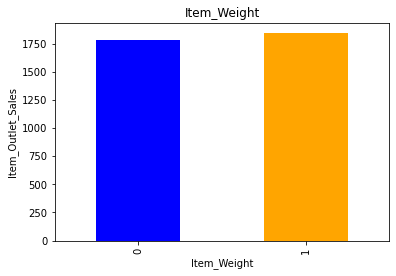

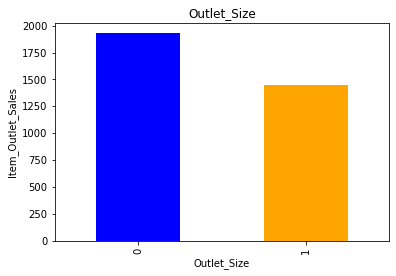

In [8]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar(color=['blue','orange'])
    plt.title(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

### Numerical Variables

In [9]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


Text(0.5, 1.0, 'Outlet_Establishment_Year vs Item_Outlet_Sales')

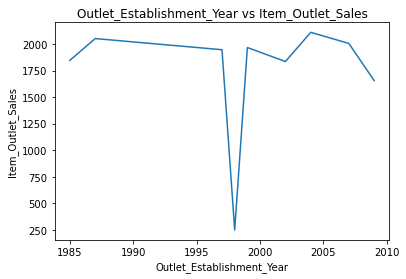

In [10]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.title("Outlet_Establishment_Year vs Item_Outlet_Sales")

In [11]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [12]:
# discrete feature
discrete_feature

['Outlet_Establishment_Year']

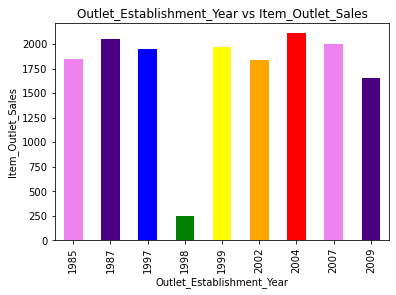

In [13]:
# bar plot of Independent feature with the dependent feature
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot.bar(color=['violet','indigo',
                                            'blue','green','yellow','orange','red'])
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Establishment_Year vs Item_Outlet_Sales' )
plt.show()

### Continuous Variable

In [14]:
# continuous features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


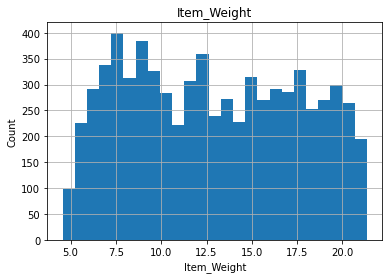

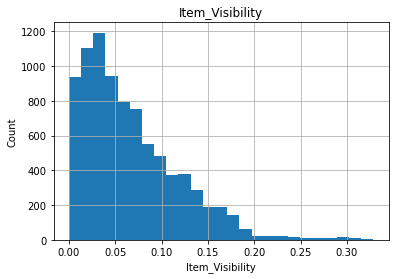

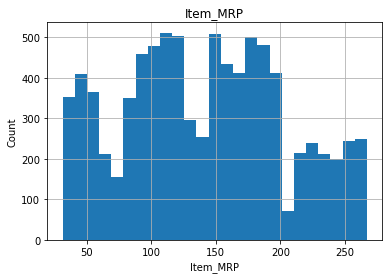

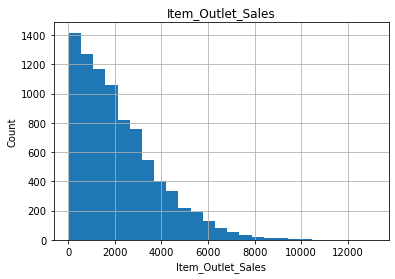

In [15]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

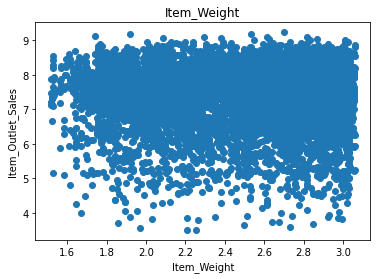

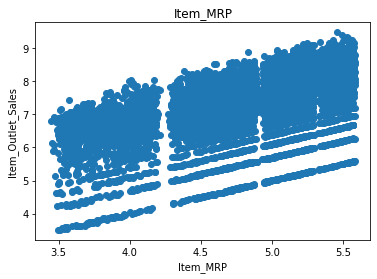

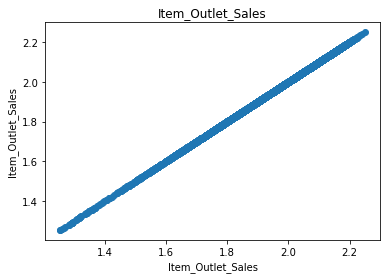

In [16]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Item_Outlet_Sales']=np.log(data['Item_Outlet_Sales'])
        plt.scatter(data[feature],data['Item_Outlet_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(feature)
        plt.show()

### Outlier

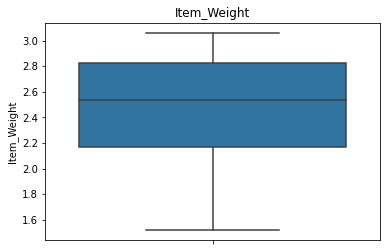

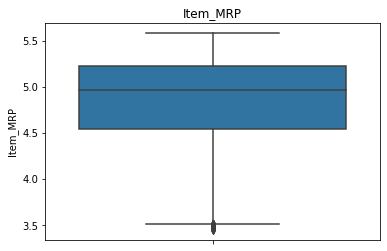

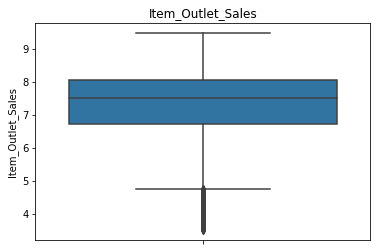

In [17]:
# box plot of continuos feature
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        sns.boxplot(y=data[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()       

#### Categorical Variables

In [18]:
# Categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [19]:
# categorical dataframe
df[categorical_features].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [20]:
# unique values in categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Item_Identifier and number of categories are 1559
The feature is Item_Fat_Content and number of categories are 5
The feature is Item_Type and number of categories are 16
The feature is Outlet_Identifier and number of categories are 10
The feature is Outlet_Size and number of categories are 4
The feature is Outlet_Location_Type and number of categories are 3
The feature is Outlet_Type and number of categories are 4


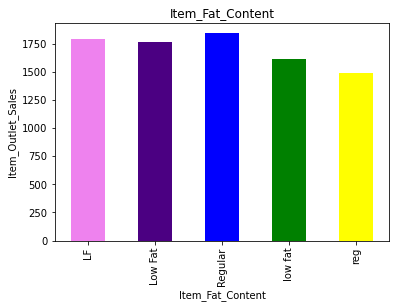

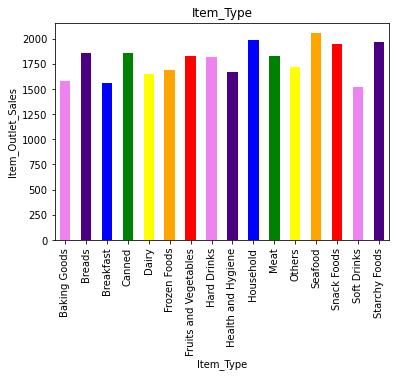

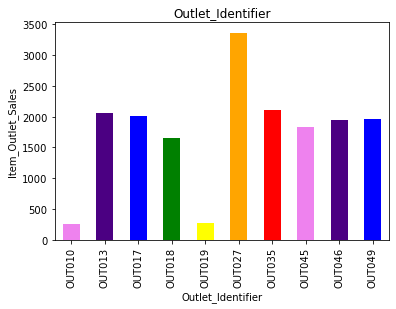

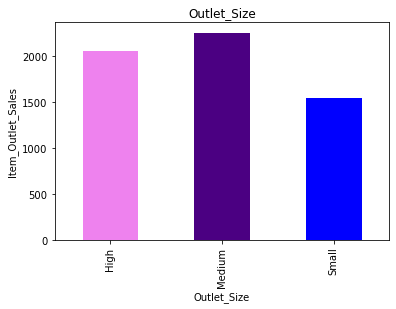

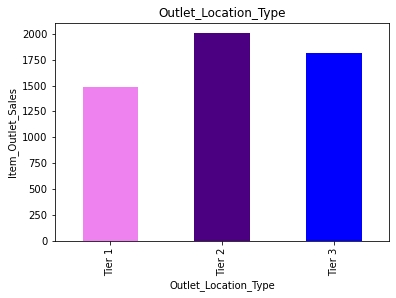

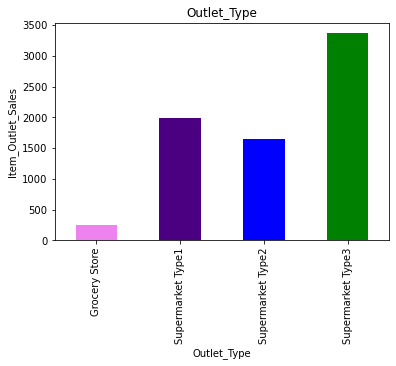

In [21]:
# bar plot of categorical features
for feature in categorical_features:
    if feature != 'Item_Identifier':
        data=df.copy()
        data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar(color=['violet','indigo','blue',
                                                        'green','yellow','orange','red'])
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(feature)
        plt.show()

In [22]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

Item_Weight: 0.1717% missing value


In [23]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

Item_Weight    0
dtype: int64

In [24]:
# import 2022  in currnt year
df['current_year'] = 2022

In [25]:
# number of years of Outlet_Establishment_Year
df['Outlet_Establishment_Year'] = df['current_year']-df['Outlet_Establishment_Year']

In [26]:
# first 5 records
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weightnan,current_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,23,Medium,Tier 1,Supermarket Type1,3735.1380,0,2022
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,13,Medium,Tier 3,Supermarket Type2,443.4228,0,2022
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,23,Medium,Tier 1,Supermarket Type1,2097.2700,0,2022
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,24,NaN,Tier 3,Grocery Store,732.3800,0,2022
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,35,High,Tier 3,Supermarket Type1,994.7052,0,2022


### Numerical Variables

- Since the numerical variables are skewed we will perform log normal distribution

In [27]:
# numerical features
import numpy as np
num_features=['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']

for feature in num_features:
    df[feature]=np.log(df[feature])

### Handling Rare Categorical Feature

In [28]:
# handling rare categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [29]:
# importing rare_vare in rare categorical features
for feature in categorical_features:
    temp=df.groupby(feature)['Item_Outlet_Sales'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')   

In [30]:
# first 5 records
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weightnan,current_year
0,Rare_var,2.230014,Low Fat,0.016047,Dairy,5.520697,OUT049,23,Medium,Tier 1,Supermarket Type1,8.225540,0,2022
1,Rare_var,1.778336,Regular,0.019278,Soft Drinks,3.876794,OUT018,13,Medium,Tier 3,Supermarket Type2,6.094524,0,2022
2,Rare_var,2.862201,Low Fat,0.016760,Meat,4.953133,OUT049,23,Medium,Tier 1,Supermarket Type1,7.648392,0,2022
3,Rare_var,2.954910,Regular,0.000000,Fruits and Vegetables,5.204529,OUT010,24,Rare_var,Tier 3,Grocery Store,6.596300,0,2022
4,Rare_var,2.189416,Low Fat,0.000000,Household,3.986414,OUT013,35,High,Tier 3,Supermarket Type1,6.902446,0,2022


In [31]:
# changing the categorical feature into numerical features 
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['Item_Outlet_Sales'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [32]:
# first 5 records
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weightnan,current_year
0,0,2.230014,3,0.016047,8,5.520697,7,23,3,0,2,8.225540,0,2022
1,0,1.778336,4,0.019278,3,3.876794,2,13,3,1,1,6.094524,0,2022
2,0,2.862201,3,0.016760,9,4.953133,7,23,3,0,2,7.648392,0,2022
3,0,2.954910,4,0.000000,12,5.204529,0,24,0,1,0,6.596300,0,2022
4,0,2.189416,3,0.000000,11,3.986414,4,35,2,1,2,6.902446,0,2022


In [33]:
# drop the columns item_weightnan,current_year
df = df.drop(['Item_Weightnan', 'current_year'], axis = 1)

In [34]:
# first 5 records
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,2.230014,3,0.016047,8,5.520697,7,23,3,0,2,8.225540
1,0,1.778336,4,0.019278,3,3.876794,2,13,3,1,1,6.094524
2,0,2.862201,3,0.016760,9,4.953133,7,23,3,0,2,7.648392
3,0,2.954910,4,0.000000,12,5.204529,0,24,0,1,0,6.596300
4,0,2.189416,3,0.000000,11,3.986414,4,35,2,1,2,6.902446


In [35]:
## for feature slection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [36]:
## Capture the dependent feature
y_train=df[['Item_Outlet_Sales']]
## drop dependent feature from dataset
X_train=df.drop(['Item_Outlet_Sales'],axis=1)

In [37]:
### Apply Feature Selection
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [38]:
# feature selection 
feature_sel_model.get_support()

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True])

In [39]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    X_train.shape[1]-len(selected_feat)))

total features: 11
selected features: 7
features with coefficients shrank to zero: 4


In [40]:
# selected features
selected_feat

Index(['Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [41]:
# dependent features
X_train=X_train[selected_feat]

In [42]:
# first 5 records of data frame
X_train.head()

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,8,5.520697,7,23,3,0,2
1,3,3.876794,2,13,3,1,1
2,9,4.953133,7,23,3,0,2
3,12,5.204529,0,24,0,1,0
4,11,3.986414,4,35,2,1,2


In [43]:
#  scaling features
scaling_feature= X_train.columns

In [44]:
# scaling features
scaling_feature

Index(['Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### Feature Scaling

In [45]:
# scaling features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[scaling_feature])

MinMaxScaler()

In [46]:
#scaler values of scaling features
scaler.transform(df[scaling_feature])

array([[0.53333333, 0.96914757, 0.77777778, ..., 1.        , 0.        ,
        0.66666667],
       [0.2       , 0.20223403, 0.22222222, ..., 1.        , 0.5       ,
        0.33333333],
       [0.6       , 0.7043677 , 0.77777778, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.26666667, 0.46688906, 0.88888889, ..., 0.33333333, 1.        ,
        0.66666667],
       [0.93333333, 0.55642873, 0.22222222, ..., 1.        , 0.5       ,
        0.33333333],
       [0.2       , 0.41072254, 0.55555556, ..., 0.33333333, 0.        ,
        0.66666667]])

In [47]:
# concatenation of dependent and independent features
data = pd.concat([df['Item_Outlet_Sales'],
                    pd.DataFrame(scaler.transform(df[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [48]:
# first 5 records 
data.head()

,Item_Outlet_Sales,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,8.225540,0.533333,0.969148,0.777778,0.416667,1.000000,0.0,0.666667
1,6.094524,0.200000,0.202234,0.222222,0.000000,1.000000,0.5,0.333333
2,7.648392,0.600000,0.704368,0.777778,0.416667,1.000000,0.0,0.666667
3,6.596300,0.800000,0.821649,0.000000,0.458333,0.000000,0.5,0.000000
4,6.902446,0.733333,0.253374,0.444444,0.916667,0.666667,0.5,0.666667


In [49]:
# seperating dependent and idependent featres
X = data.drop(['Item_Outlet_Sales'],axis=1)
y = data['Item_Outlet_Sales']

### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

#### Linear Regression Model:

In [51]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([6.91981122, 6.29974563, 6.5305154 , ..., 7.88728029, 7.88063538,
       6.4521725 ])

In [53]:
from sklearn import metrics

In [54]:
# R squared Value
r2_train = metrics.r2_score(y_test, y_pred)

In [55]:
r2_train

0.740080077436635

### Decision Tree Model:

In [56]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=20,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=300)

In [57]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([7.00200385, 6.36564749, 6.36564749, ..., 7.80484262, 7.95432377,
       6.7032729 ])

In [58]:
# R squared Value
r2_score = metrics.r2_score(y_test, y_pred)
r2_score

0.7107496400361923

#### Random Forest Model:

In [59]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [60]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([6.93543099, 6.42887132, 6.37804943, ..., 7.90748106, 7.95918676,
       6.60999239])

In [61]:
# R squared Value
r2_score = metrics.r2_score(y_test, y_pred)
r2_score

0.7429627779821154

#### XGBoost Regressor Model

In [62]:
from xgboost import XGBRegressor

In [63]:
regressor = XGBRegressor()

In [64]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([6.8670316, 6.536348 , 6.525953 , ..., 8.075082 , 8.103735 ,
       6.4862337], dtype=float32)

In [66]:
# R squared Value
r2_score = metrics.r2_score(y_test, y_pred)
r2_score

0.708149181002085

### conclusion

- from the above models RandomForestRegressor can give better performance than the remaining 
models 